In [10]:
import pandas as pd

covid_data = pd.read_csv('data1/covid_data.csv')
display(covid_data.tail())

,date,province/state,country,confirmed,deaths,recovered
306424,05/29/2021,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,China,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0
306428,05/29/2021,Zuid-Holland,Netherlands,391559.0,4252.0,0.0


In [31]:
vaccinations_data = pd.read_csv('data1/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head(3))

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [30]:
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   date                                 42795 non-null  object 
 2   total_vaccinations                   23457 non-null  float64
 3   people_vaccinated                    22371 non-null  float64
 4   people_vaccinated_per_hundred        22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   vaccines                             42795 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


In [34]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [35]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [36]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [38]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [39]:
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [41]:
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


In [47]:
print(f"Данные о заболеваемости представлены за период от {covid_data['date'].min()} до {covid_data['date'].max()}")

Данные о заболеваемости представлены за период от 2020-01-22 00:00:00 до 2021-05-29 00:00:00


In [48]:
print(f"Данные о вакцинации представлены за период от {vaccinations_data['date'].min()} до {vaccinations_data['date'].max()}")

Данные о вакцинации представлены за период от 2020-12-02 00:00:00 до 2021-09-06 00:00:00


In [51]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


In [52]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [63]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [58]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

In [64]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

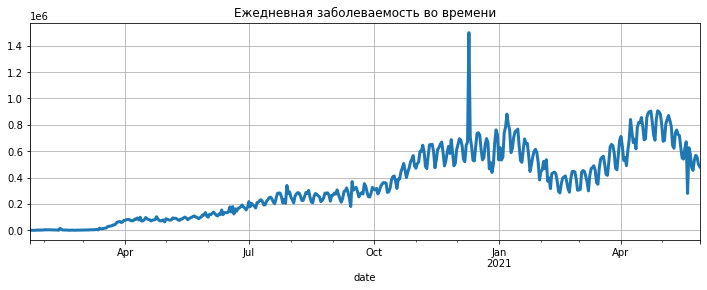

In [73]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

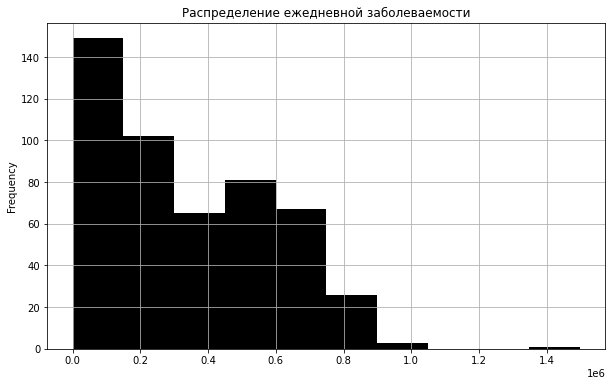

In [77]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

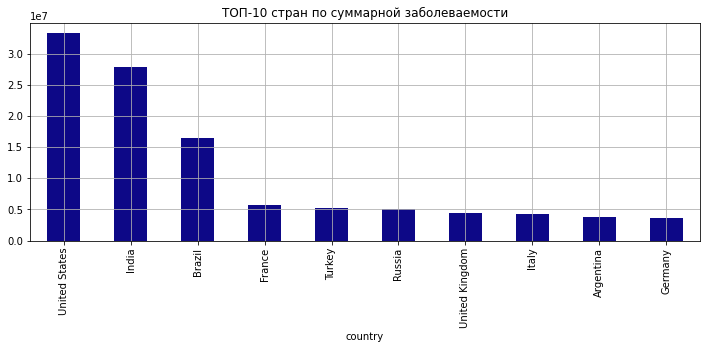

In [79]:
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    title='ТОП-10 стран по суммарной заболеваемости',
    figsize=(12, 4),
    colormap='plasma'
);

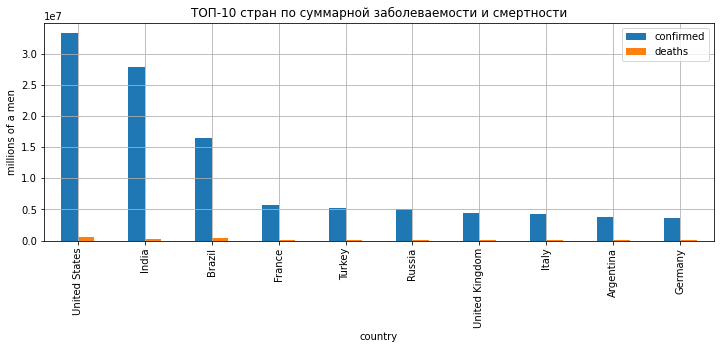

In [86]:
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    title='ТОП-10 стран по суммарной заболеваемости и смертности',
    figsize=(12, 4),
    ylabel='millions of a men'
);

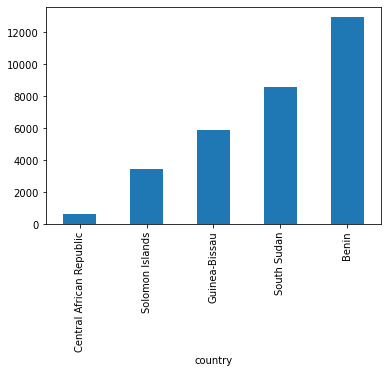

In [89]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');